These are some of the libraries that will be helpful to complete this activity. We will import some others along the way.

In [9]:
# We have used these already
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.rcParams[ 'figure.figsize' ] = (6,6)

# New libraries
import re

#   `lesson5`:  Text Statistics & Generation



We will start off by analyzing the relative frequency of words in William Shakespeare's corpus.  We will compare this to [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law), which states that, "the frequency of any word is inversely proportional to its rank in the frequency table."  In other words, the most frequent word is about twice as common as the next frequent word and three times as common as the third most frequent word.

For instance, the word frequency plot of the data on Wikipedia is:

![](https://upload.wikimedia.org/wikipedia/commons/b/b9/Wikipedia-n-zipf.png)

A perfect Zipf's law fit would be a straight line with some constant in the denominator's exponent, but that's not a bad fit at all.

Formally, let:
* $N$ be the number of elements;
* $k$ be their rank;
* $s$ be the value of the exponent characterizing the distribution.

Zipf's law then predicts that out of a population of $N$ elements, the normalized frequency of elements of rank $k$, $f(k;s,N)$, is:


$$
f(k;s,N)
=
\frac{1/k^s}{\sum\limits_{n=1}^N (1/n^s)}
$$

Go to this website:

https://www.gutenberg.org/files/100/100-0.txt

The text has the complete work of William Shakespeare!

We will get the content using the code snippet below, and store it in `shakespeare_data`.

In [14]:
shakespeare_url = 'https://www.gutenberg.org/files/100/100-0.txt'

import requests
shakespeare_data= requests.get( shakespeare_url )

shakespeare_text = shakespeare_data.text

Check the length of the string in `shakespeare_text`

In [11]:
len(shakespeare_text)

5777367

[Project Gutenberg](https://www.gutenberg.org/) texts frequently have a header and footer delimited from the rest of the text by three asterisks `***` before and a number of blank lines afterwards.  (It's not 100% consistent across texts.)  We will clean the text first by stripping those off.

In [12]:
header_marker = '*** START OF THIS PROJECT GUTENBERG EBOOK THE COMPLETE WORKS OF WILLIAM SHAKESPEARE ***'
header_end = shakespeare_text.find( header_marker ) + len( header_marker )

footer_marker = 'FINIS'
footer_start = shakespeare_text.rfind( footer_marker ) + len( footer_marker )

text = shakespeare_text[ header_end:footer_start ]

In [13]:
print( text[ :90 ] )
print( '---' )
print( text[ -90: ] )






The Complete Works of William Shakespeare



by William Shakespeare




---
 to Paphos, where their queen
  Means to immure herself and not be seen.




  FINIS


We need to decide what to do with act/scene annotations, stage directions, speaking indicators, numbers, and line breaks (`'\r'` v. `'\n'`).

1) Act/scene annotations have the form `ACT_4|SC_14`.  We can match these using _regular expressions_, which is a way of matching specific text structures.  In this case, we will match and replace entries of the form, `'ACT_{0..9}|SC_{0..9}{0..9}'`.  There aren't many of these, but we'll clean them up.

2) Stage directions (_Exeunt_) are difficult to detect.  We'll leave them in.

3) Speaking indicators (CLEOPATRA.) are also very hard to consistently identify in arbitrary text.  Sometimes they are on a line by themselves, but sometimes they are not.  We'll leave them in.

4) Numbers only occur in acts, scenes, and pages.  We will remove them.

##### Remove act/scene annotations and numbers

Take a look at this example. We will use the module `re` (Regular expression operations). 

Observe how the resulting string compares to the original one.

In [15]:
example_string = "This is the second act. ACT_2: A man was standing at the door. \
ACT_5: Not sure what to write here. ACT_: This has no number. ACT_1|SC_41: \
In this scene, the girl is sleeping."

new_string = re.sub(r'ACT_[0-9]','',example_string)
new_string

'This is the second act. : A man was standing at the door. : Not sure what to write here. ACT_: This has no number. |SC_41: In this scene, the girl is sleeping.'

We will do the first steps for you:

In [30]:
text_no_acts = re.sub( r'ACT_[0-9]','',text )
text_no_acts = text_no_acts.replace( 'ACT_','' )
print(text_no_acts[3000:5000])

eauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deservâd thy beautyâs use,
If thou couldst answer âThis fair child of mine
Shall sum my count, and make my old excuse,â
Proving his beauty by succession thine.
  This were to be new made when thou art old,
  And see thy blood warm when thou feelâst it cold.


                    3

Look in thy glass and tell the face thou viewest,
Now is the time that face should form another,
Whose fresh repair if now thou not renewest,
Thou dost beguile the world, unbless some mother.
For where is she so fair whose uneared womb
Disdains the tillage of thy husbandry?
Or who is he so fond will be the tomb
Of his self-love to stop posterity?
Thou art thy motherâs glass and she in thee
Calls back the lovely April of her prime,
So thou through windows of thine age shalt see,
Despite of wrinkles this thy golden time.
  But if thou

Now you have to remove text of the form  `SC_XX` (XX are digits 0-9) and `SC_`

In [37]:

text_clean = re.sub( r'SC_[0-9]','',text_no_acts )
text_clean = text_clean.replace( 'SC_','' )
print(text_clean[:1000])






The Complete Works of William Shakespeare



by William Shakespeare




      Contents



               THE SONNETS

               ALLâS WELL THAT ENDS WELL

               THE TRAGEDY OF ANTONY AND CLEOPATRA

               AS YOU LIKE IT

               THE COMEDY OF ERRORS

               THE TRAGEDY OF CORIOLANUS

               CYMBELINE

               THE TRAGEDY OF HAMLET, PRINCE OF DENMARK

               THE FIRST PART OF KING HENRY THE FOURTH

               THE SECOND PART OF KING HENRY THE FOURTH

               THE LIFE OF KING HENRY THE FIFTH

               THE FIRST PART OF HENRY THE SIXTH

               THE SECOND PART OF KING HENRY THE SIXTH

               THE THIRD PART OF KING HENRY THE SIXTH

               KING HENRY THE EIGHTH

               KING JOHN

               THE TRAGEDY OF JULIUS CAESAR

               THE TRAGEDY OF KING LEAR

               LOVEâS LABOURâS LOST

               THE


Remove all the numbers. Your resulting cleaned text should be stored in the variable `text_clean`

In [38]:
text_clean = re.sub( r'[0-9]','',text_clean )


In [39]:

print( text_clean[ :1500 ] )
print( '---' )
print( text_clean[ -1500: ] )






The Complete Works of William Shakespeare



by William Shakespeare




      Contents



               THE SONNETS

               ALLâS WELL THAT ENDS WELL

               THE TRAGEDY OF ANTONY AND CLEOPATRA

               AS YOU LIKE IT

               THE COMEDY OF ERRORS

               THE TRAGEDY OF CORIOLANUS

               CYMBELINE

               THE TRAGEDY OF HAMLET, PRINCE OF DENMARK

               THE FIRST PART OF KING HENRY THE FOURTH

               THE SECOND PART OF KING HENRY THE FOURTH

               THE LIFE OF KING HENRY THE FIFTH

               THE FIRST PART OF HENRY THE SIXTH

               THE SECOND PART OF KING HENRY THE SIXTH

               THE THIRD PART OF KING HENRY THE SIXTH

               KING HENRY THE EIGHTH

               KING JOHN

               THE TRAGEDY OF JULIUS CAESAR

               THE TRAGEDY OF KING LEAR

               LOVEâS LABOURâS LOST

               THE TRAGEDY OF MACBETH

               MEASURE FOR MEASURE


##### Break text into pieces by whitespace (easy) and by punctuation (tedious).

In [40]:
# Identify all non-alphabet, non-whitespace, non-digit characters, the punctuation.
text_clean = re.sub( r'[0-9]','',text_clean )

punctuation = set()
for i in text_clean:
    if not i.isalpha() and i not in ( '\r','\n','\t',' ','\'','-'):
        punctuation.add( i )
print( punctuation )
print(len(punctuation))

{'(', '"', '`', '?', ']', '&', '[', '\x9c', ',', '¨', ';', '\x9d', ':', '\xa0', '®', '|', '\x89', '©', '\\', '¢', '¦', '.', '!', '\x94', '_', '\x93', '§', '*', '\x86', '}', '\x80', ')', '\x98', '\x99'}
34


In [2]:
text_clean = re.sub( r'[0-9]','',text_clean )

punctuation = set()
for i in text_clean:
    if not i.isalpha() and i not in ( '\r','\n','\t',' ','\'','-'):
        punctuation.add( i )
print( punctuation )
print(len(punctuation))

for mark in punctuation:
    text_clean = text_clean.replace( mark,'' )
words = text_clean.lower().split()

NameError: name 're' is not defined

We finally have a list of words that appear in the text! 

In [42]:
print(len(words))
words[:20]

956829


['the',
 'complete',
 'works',
 'of',
 'william',
 'shakespeare',
 'by',
 'william',
 'shakespeare',
 'contents',
 'the',
 'sonnets',
 'allâs',
 'well',
 'that',
 'ends',
 'well',
 'the',
 'tragedy',
 'of']

Now we have the list of words.  Turning this into a dictionary by count should be old hat for you.

Make a dictionary which contains each word as a key with the corresponding number of times the word occurs in `text_clean`. Save that in `word_count`

In [46]:
word_count = {}
for word in words:
    if word not in word_count:
        word_count[word] = 1
    else:
        word_count[word] += 1
      
    

#word_count

We turn this into a Pandas DataFrame sorted by frequency.  This makes plotting the text data easier.

In [47]:
sorted_by_value = sorted( word_count.items(),key=lambda kv: kv[ 1 ] )[ ::-1 ]
df = pd.DataFrame( sorted_by_value,columns=('Word','Frequency') )

In [48]:
df.head()

,Word,Frequency
0,the,29933
1,and,28278
2,i,21515
3,to,20799
4,of,18670


Text(0, 0.5, 'frequency')

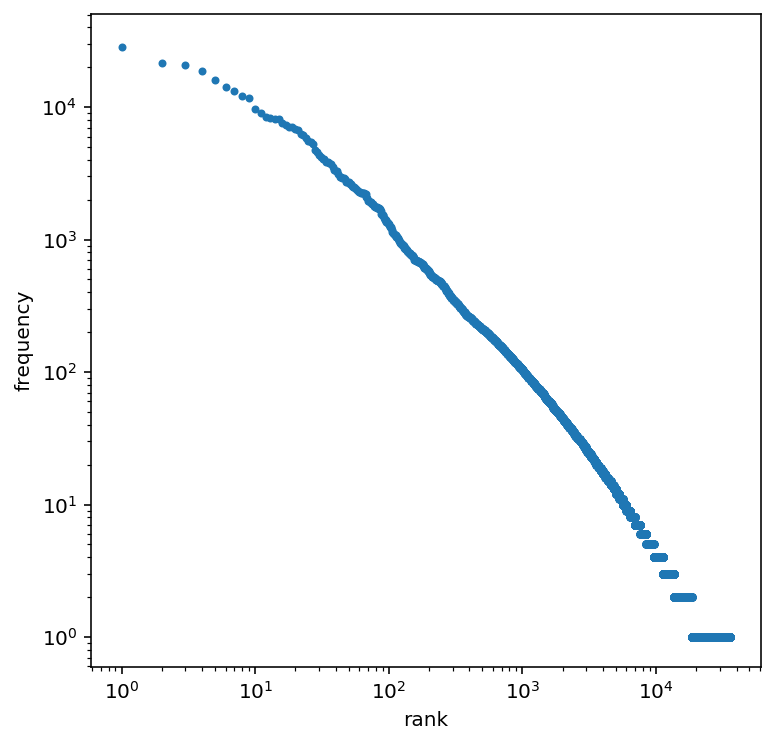

In [49]:
plt.loglog(df['Frequency'],'.')
plt.xlabel('rank')
plt.ylabel('frequency')

We can fit Zipf's law to this either as an overall match or piecewise where the distribution curves down in log–log space.  Recall our definition.

$$
f(k;s,N)
=
\frac{1/k^s}{\sum\limits_{n=1}^N (1/n^s)}
$$

Write the function `f(k,s,N)`:

In [55]:
def f( k,s,N ):
    nu = (1 / k**s)
    de = 0
    for i in range(1, N+1):
        de += 1 / i**s
        
    return nu / de

Let's just pick $s = 1$ for now.  We'll fit it later, but let's get the plot working first.

In [56]:
N = len( words )
s = 1.0
k = np.logspace( 0,5 )

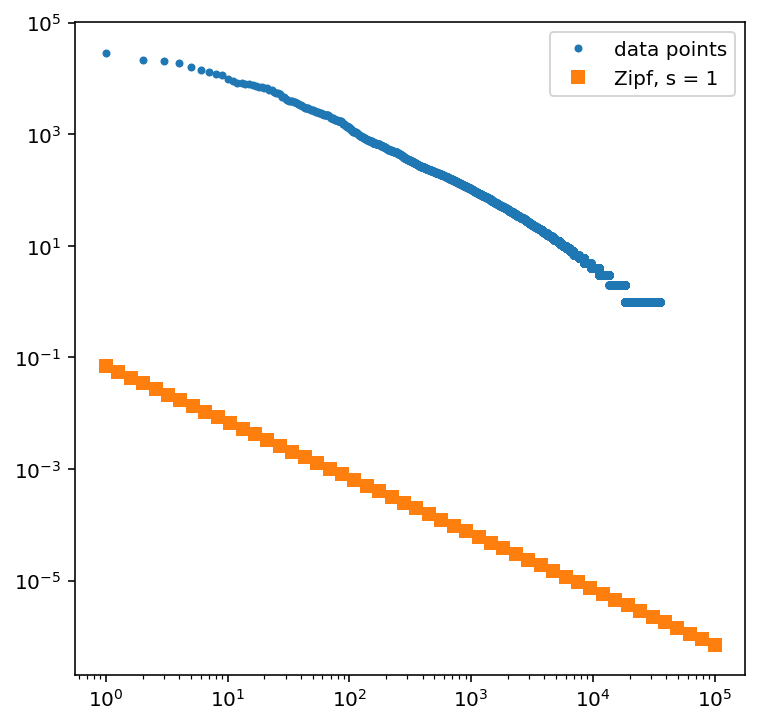

In [57]:
plt.loglog(df['Frequency'],'.',label='data points')
plt.plot( k,f(k,s,N ),'s',label='Zipf, s = 1')
plt.legend()

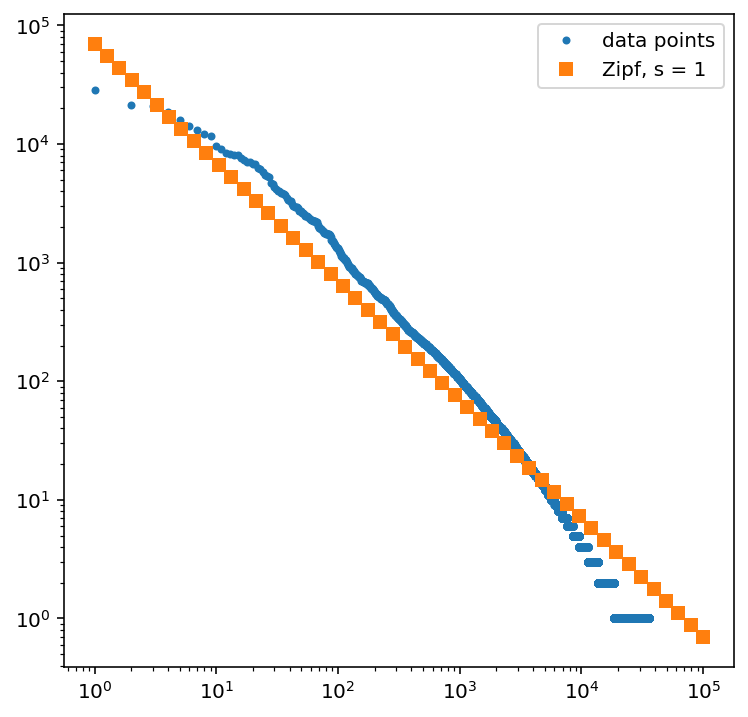

In [58]:
# Scaling up so that the line coincides
plt.loglog(df['Frequency'],'.',label='data points')
plt.plot( k,f(k,s,N )*1e6,'s',label='Zipf, s = 1')
plt.legend()

An actual regression to obtain the coefficient $s$ can be carried out.  There are many packages in Python libraries which can perform a fit.  We will use [`scipy.optimize.curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

In [63]:
from scipy.optimize import curve_fit
x = np.log( np.array( df.index ) + 2 )  # only rank matters, so throw away -inf and 0
y = np.log( df[ 'Frequency' ] )

We need to define the function `f_fit` such that:

In [64]:
def f_fit(k,s):
    # k: independent variable, here the rank
    # s: parameter that we want to fit
    numer = k ** -s
    N = len(words)
    denom = np.sum( [ n ** -s for n in range( 1,N+1 ) ] )
    return numer/denom

Curve fit will give the optimal result for the parameter that you are trying to fit, here the value of `s`


In [65]:
sopt,_ = curve_fit( f_fit,x,y )

In [66]:
sopt

array([1.39491411])

Note that the value of `s` is close to the value `1` that you used in the first plot (when referring to the frequency of words in the English language, where N is the number of all the English words, the classic version of Zipf's law has the exponent s equal to 1).

Now you can plot the Zipf's function using the fit exponent. Compare your previous fit (s=1), the best fit, and the data points.

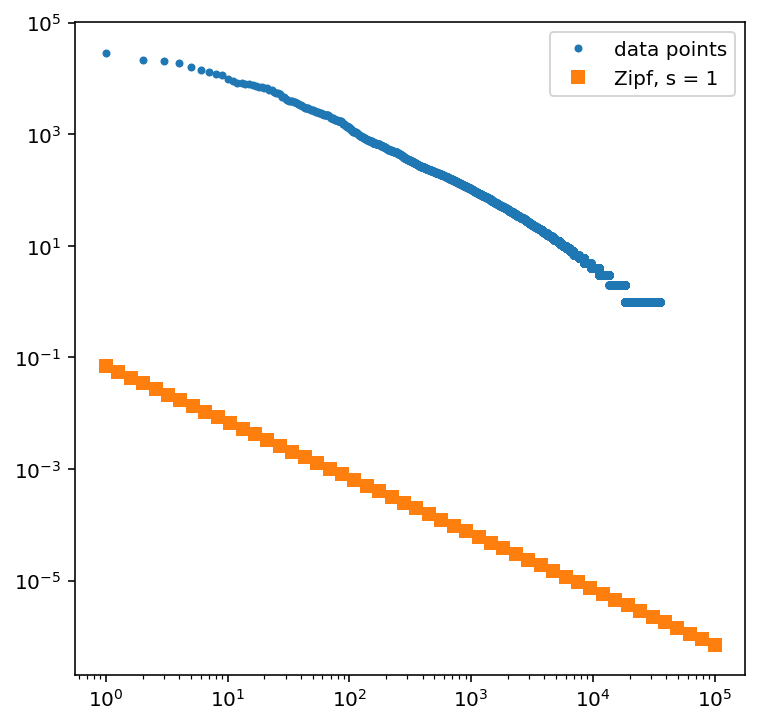

In [69]:
plt.loglog(df['Frequency'],'.',label='data points')
plt.plot( k,f_fit(k,s),'s',label='Zipf, s = 1')
plt.legend()


##  Markov-Chain Text Generation

Given a sufficiently large corpus of words, we can train a Markov chain generator (a kind of machine learning algorithm) to randomly generate similar text.

A Markov chain represents a series of states with transition probabilities between them.  For instance, for a hypothetical text, the following possible sentence fragments can be generated:

![](./img/markov-chain.png)

That is, at each point in the graph, a random value is generated and used to select one of several possible following states.  The example above is simply a tiny subset of the possible phrases (which in practice would be complicated by our omission of punctuation).

We can train a Markov chain generator by feeding it many possible phrases.  It uses these to assign probabilities to each state and therefore generate "similar" text samples.

_This code is based on [Eli Bendersky's Markov text generator](https://eli.thegreenplace.net/2018/elegant-python-code-for-a-markov-chain-text-generator/)._

Read the code snippets below, and make sure you understand how the training and samplings work.

In [3]:
from collections import defaultdict, Counter
import random
import sys

# This is the length of the "state" the current character is predicted from.
# For Markov chains with memory, this is the "order" of the chain. For n-grams,
# n is STATE_LEN+1 since it includes the predicted character as well.
STATE_LEN = 4
data = text_clean.lower()
model = defaultdict( Counter )

print( 'Learning model...' )
for i in range( len( data )-STATE_LEN ):
    state = data[ i:i+STATE_LEN ]
    next_state  = data[   i+STATE_LEN ]
    model[ state ][ next_state ] += 1


NameError: name 'text_clean' is not defined

In [68]:
N_CHARS = 500

print( 'Sampling...' )
state = random.choice( list( model ) )
out = list( state )
for i in range( N_CHARS ):
    out.extend(random.choices( list( model[ state ] ),model[ state ].values() ) )
    state = state[ 1: ] + out[ -1 ]
print( ''.join( out ) )

Sampling...
rr than to my libert

 dispatch'd he'll be to lay henry if it but he born
the die
     and take an and him at and be the like eye do to fray you sweet ride a publish he many swearine-hang upon of vellingbroke

dromio of peace in and every sir
horatifyât

cinnace of timon canst thou has a place demantus which him henry they stancy of essed to his woods
these spend undon prince a heave be minius the fortunate their give his unto that thout thing hasting of titutes to me hear
  mrs parally b


This version is based on the _letters_ only, which means that it does some strange things, like create new words.  I saw `"conventur'd"` and `"leavenge"`, for instance.

A better version would use words instead of letters.  Let's write one.

In [70]:
from collections import defaultdict, Counter
import random
import sys

# This is the length of the "state" the current character is predicted from.
# For Markov chains with memory, this is the "order" of the chain. For n-grams,
# n is STATE_LEN+1 since it includes the predicted character as well.
STATE_LEN = 4

data = words
model = {}

print( 'Learning model...' )
for i in range( len( data )-STATE_LEN ):
    state = data[ i:i+STATE_LEN ]
    next_state  = data[   i+STATE_LEN ]
    if tuple( state ) in model:
        if next_state in model[ tuple( state ) ]:
            model[ tuple( state ) ][ next_state ] += 1
        else:
            model[ tuple( state ) ][ next_state ] = 1
    else:
        model[ tuple( state ) ] = {}
        model[ tuple( state ) ][ next_state ] = 1

Learning model...


In [71]:
N_WORDS = 50

print( 'Sampling...' )
state = random.choice( list( model ) )
out = list( state )
for i in range( N_WORDS ):
    out.extend( random.choices( list( model[ state ] ),model[ state ].values() ) )
    state = state[ 1: ] + ( out[ -1 ], )

print( ' '.join( out ) )

Sampling...
elizabeth harp on it still shall i till heartstrings break king richard now by my george my garter and my crown- queen elizabeth profan'd dishonour'd and the third usurp'd king richard i swear- queen elizabeth by nothing for this is no oath thy george profan'd hath lost his lordly honour thy garter blemish'd pawn'd


If you spot-check this, you'll find that there are several 5-word or 6-word direct quotes from Shakespeare.  This occurs when there is only one high-likelihood chain to follow.

### Another text example

https://github.com/ryanmcdermott/trump-speeches

In [72]:
import numpy as np
trump = open('speeches.txt', encoding='utf8').read()

Time for you to apply what you just learned with a different text.

First split the text into a list of words. Then use the "learning" code snippet, with STATE_LEN = 2, and generate a text with 200 words. 

In [98]:


#1 Split the text into a list of words
trump = re.sub( r'[0-9]','',trump )

punctuation = set()
for i in trump:
    if not i.isalpha() and i not in ( '\r','\n','\t',' ','\'','-'):
        punctuation.add( i )

for mark in punctuation:
    trump = trump.replace( mark,'' )
words = trump.lower().split()

#2 Use the "learning" code snippet

STATE_LEN = 2


data = words
model = {}

for i in range( len( data )-STATE_LEN ):
    state = data[ i:i+STATE_LEN ]
    next_state  = data[   i+STATE_LEN ]
    if tuple( state ) in model:
        if next_state in model[ tuple( state ) ]:
            model[ tuple( state ) ][ next_state ] += 1
        else:
            model[ tuple( state ) ][ next_state ] = 1
    else:
        model[ tuple( state ) ] = {}
        model[ tuple( state ) ][ next_state ] = 1
    
#3 Generate a text with 200 words.
N_CHARS = 200

state = random.choice( list( model ) )
out = list( state )
for i in range( N_WORDS ):
    out.extend( random.choices( list( model[ state ] ),model[ state ].values() ) )
    state = state[ 1: ] + ( out[ -1 ], )

print( ' '.join( out ) )

like the press look at number the real bosses those are great people leading really big in new york new jersey to texas or whatever the hell can you believe this thats not so distant future if i get elected and thats not going to be over the place through the motions


You can change the value of `STATE_LEN` and see what happens. What do you observe? Do you think yout results make sense?

##  Natural Language Processing

We can carry out other interesting text classification and statistical tasks.  One tool that is helpful in this regard is the [Natural Language ToolKit](http://www.nltk.org/), which implements many natural language processing tasks like identifying parts of speech.

In [73]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/user/nltk_data...


[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/user/nltk_data...


[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/user/nltk_data...


[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/user/nltk_data...


[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to /home/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

NLTK can tokenize the words. This is similar to how we broke things up above with the Shakespearean corpus, but a lot easier! 

In [78]:
tokens = nltk.word_tokenize( trump )

In [79]:
print(tokens[:10])

['...', 'Thank', 'you', 'so', 'much', '.', 'That', "'s", 'so', 'nice']


It can then tag the tokens according to inferred part of speech.

In [80]:
tagged = nltk.pos_tag( tokens )

In [103]:
print( tagged[:10])


[('...', ':'), ('Thank', 'NN'), ('you', 'PRP'), ('so', 'RB'), ('much', 'RB'), ('.', '.'), ('That', 'DT'), ("'s", 'VBZ'), ('so', 'RB'), ('nice', 'JJ')]


The tags of parts of speech [can be very complicated](http://www.nltk.org/book/ch05.html).  Look for things like prepositions `IN`, verbs `VBP`, and nouns `NN`. Some other examples:

- CC coordinating conjunction
- CD cardinal digit
- FW foreign word
- NN noun, singular 'desk'
- NNS noun plural 'desks'
- PRP personal pronoun I, he, she
- PRP$ possessive pronoun my, his, hers
- RB adverb very, silently,


Let's get the frequency of each word that appears in the text. Instead of using the approach from the first part, we will use a function from NLTK.

In [104]:
from nltk.probability import FreqDist

In [105]:
fdist = FreqDist(tokens)
print(fdist)

<FreqDist with 7802 samples and 213823 outcomes>


We can now plot the 30 most frequent words:

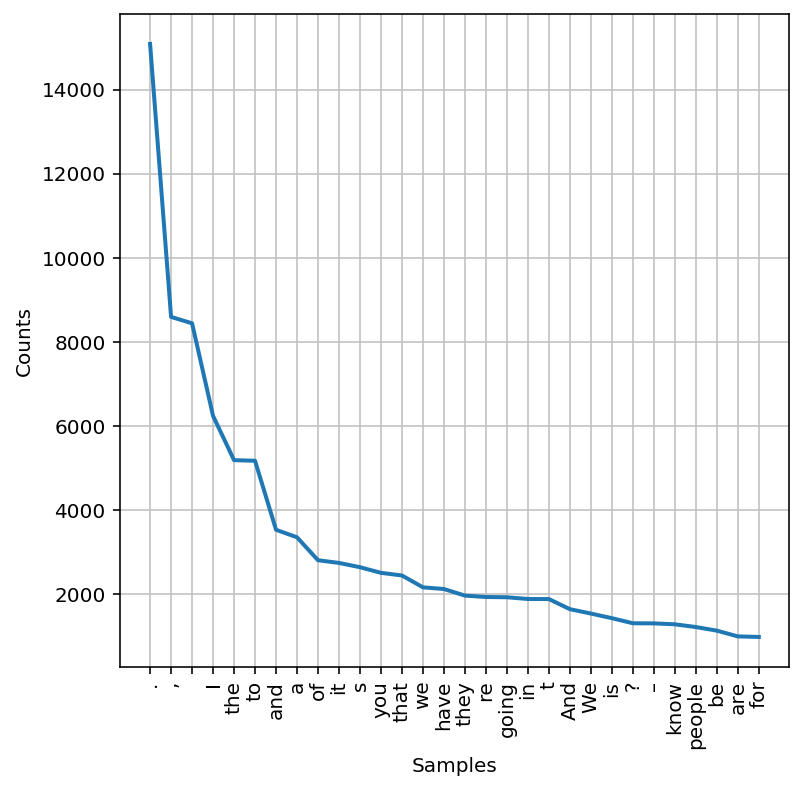

In [106]:
fdist.plot(30,cumulative=False)
plt.show()

It is not surprising that words such as "I", "and", "it" appear frequently in the text. They are the so-called stop words. 

Often we should filter stop words from the text to be processed. The nltk module contains a list of stop words.


In [107]:
from nltk.corpus import stopwords 

In [108]:
stopwords.words('english')[:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

Write a code snippet that loops over the words in the text, and removes the words that appear in the list `stopwords.words('english')`. You can use `.remove` for that.

To make sure your code snippet runs fast, use only the first 10000 entries of the text saved in `tokens`. Plot the frequency of the 30 words that have the highest count once the stop words are removed.

In [109]:
small_tokens = tokens[:10000]

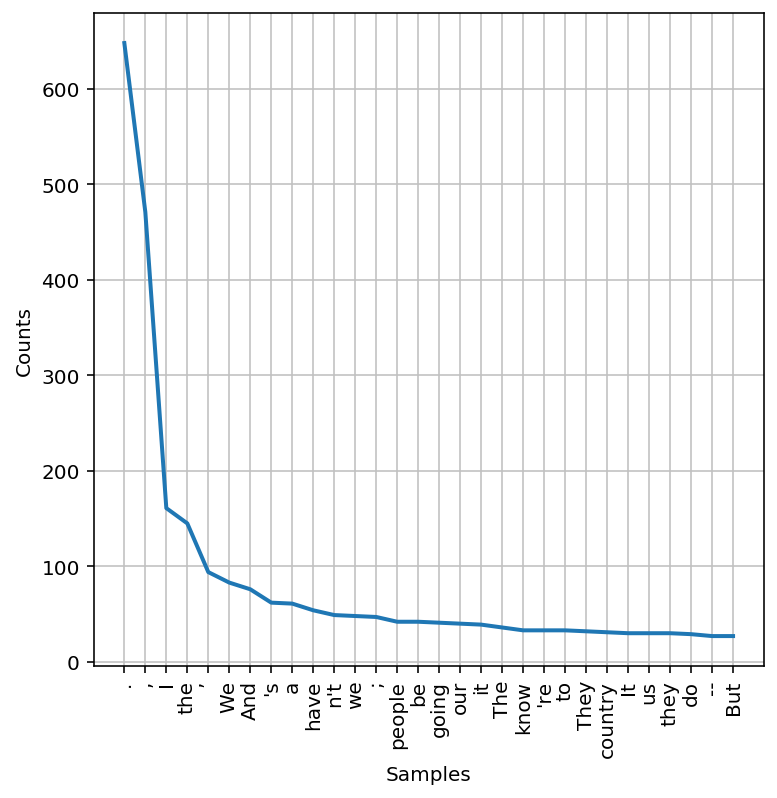

In [110]:
for token in small_tokens:
    if token in stopwords.words('english'):
        small_tokens.remove(token)

freq = FreqDist(small_tokens)
freq.plot(30, cumulative=False)
plt.show()

### Just one more website:

The code snippet below gets the text of a blog. We will use BeautifulSoup for webscrapping, similar to what we did in lesson 3. 

In [119]:
import requests
from bs4 import BeautifulSoup

url = 'https://amerisleep.com/blog/oversleeping-the-health-effects/'
res = requests.get(url)
html_page = res.content
soup = BeautifulSoup(html_page, 'html.parser')
text = soup.find_all(text=True)
 
# Removing some part of the webpage that not relevant for the text scrapping.
new_text = ''
blacklist = ['[document]','noscript','header','html','meta','head', 'input','script']

for t in text:
    if t.parent.name not in blacklist:
        new_text += '{} '.format(t)

Now that you have this `new_text`, use `nltk` to get the tokens (the list of words in the text), remove the stop words and plot the frequency. Can you tell what is the topic of the website without reading the text (or paying attention to the url)? 

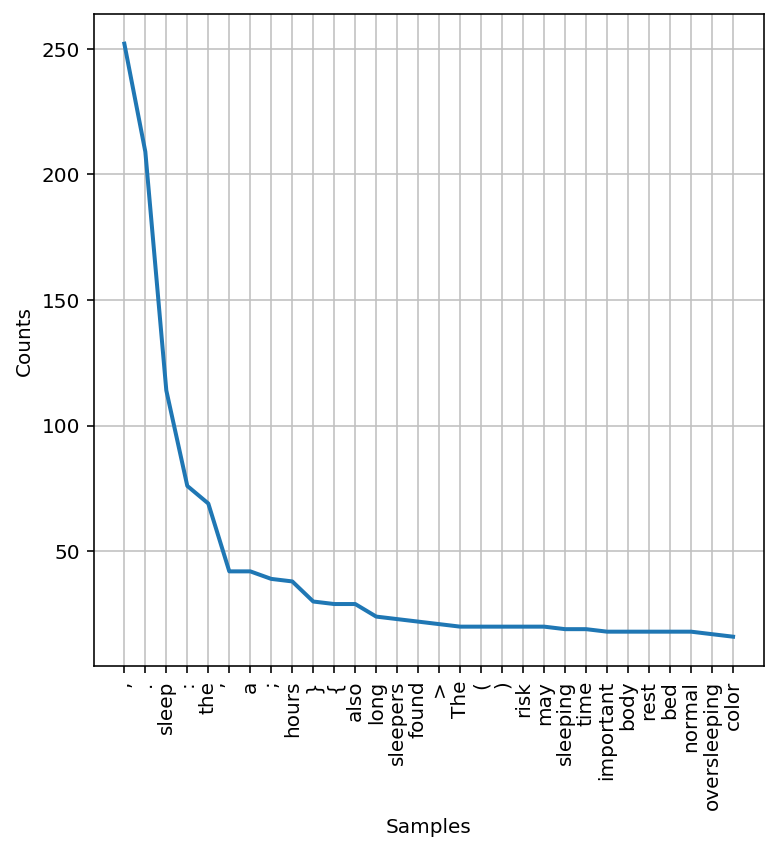

In [120]:

tokens = nltk.word_tokenize( new_text )
fdist = FreqDist(tokens)
for token in tokens:
    if token in stopwords.words('english'):
        tokens.remove(token)

freq = FreqDist(small_tokens)
freq.plot(30, cumulative=False)
plt.show()


In [0]:
## PL solution 
import numpy as np
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# 1. Load dataset

df = pd.read_csv("spam.csv")

# 2. Split Spam and Ham

spam = df[df['Label'] == 'spam']
ham = df[df['Label'] == 'ham']

num_total = len(spam.to_numpy()) + len(ham.to_numpy())
num_spam = len(spam.to_numpy())
num_ham = len(ham.to_numpy())

prob_spam = float(num_spam)/num_total
prob_ham = float(num_ham)/num_total




# 3. Create tokenizer function

def tokenize_text(message):
    """
    message: A string containing a single sentence.
    returns: A list of tokens.
    """
    # Implement me!
    # - Tokenize the message
    # - Remove non word tokens and stopwords
    # - Convert tokens to lemmas
    # - Convert everything to lowercase
    stopWords = set(stopwords.words('english')) 
    message = nltk.word_tokenize(message)
    ret = []

    for word in message:
        
        if str.isalpha(word) and word not in stopWords:
        
            lemmatizer = WordNetLemmatizer()
            lemma = lemmatizer.lemmatize(word)
            lemma = lemma.lower()
            ret.append(lemma)
    
    return ret

# an example to test your function:
print(tokenize_text(df.values[0, 1]))
# the expected output:
print(['go', 'jurong', 'point', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat'])

# 4. Get Word Probabilities

prob_spam_words = {}
prob_ham_words = {}


# Uncomment this once you get to it.

for text in spam.values[:,1]:
    tokens = tokenize_text(text)
    for token in tokens:
        if token not in prob_spam_words:
            prob_spam_words[token] = 1./num_total
        else: 
            prob_spam_words[token] += 1./num_total 

for text in ham.values[:,1]:
    tokens = tokenize_text(text)
    for token in tokens:
        if token not in prob_ham_words:
            prob_ham_words[token] = 1./num_total
        else: 
            prob_ham_words[token] += 1./num_total 


# 5. Classify message
            
def get_class_probability(tokens, probabilities):
    eta = 0
    for token in tokens:
        p = 1e-4
        if token in probabilities:
            p = probabilities[token]
        eta += np.log(p)
    return np.exp(eta)



pws = get_class_probability(test_message,prob_spam_words)
prob_msg_spam = pws*prob_spam 
phs = get_class_probability(test_message,prob_ham_words)
prob_msg_ham = phs*prob_ham
is_spam = False if prob_msg_spam > prob_msg_ham else True


